# Importar Librerias

In [1]:
## Tratamiento de datos
import pandas as pd
import numpy as np
## Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
# Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Obtener los Datos

## a) Leer el archivo Trilobite.csv y cargarlo en el DataFrame llamado Datos

In [2]:
Datos=pd.read_csv('Trilobite.csv',encoding = 'latin1',delimiter= ';')

## b) Verificar los cinco primeros registros

In [3]:
Datos.head(5)

,Genero,Glabellar.Length,Glabellar.Width,Body.Length
0,Acasta,3.50,3.77,23.14
1,Balizoma,3.97,4.08,14.32
2,Calimena,10.91,10.72,51.69
3,Cerauro,4.90,4.69,21.15
4,Cheiruro,9.33,12.11,31.74


# 2. Gráficos

## a) Utilize seaborn para crear un JointGrid y comparar las variables Glabellar.Length y Body.Length

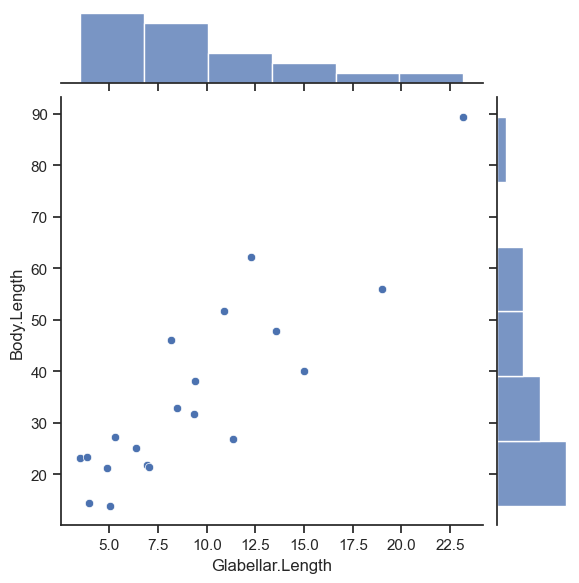

In [4]:
sns.set(style="ticks")
g = sns.JointGrid(data=Datos, x="Glabellar.Length", y="Body.Length")
g.plot(sns.scatterplot, sns.histplot)

## b) Use seaborn para crear un Jointplot que compare las variables Glabellar.Width y Body.Length

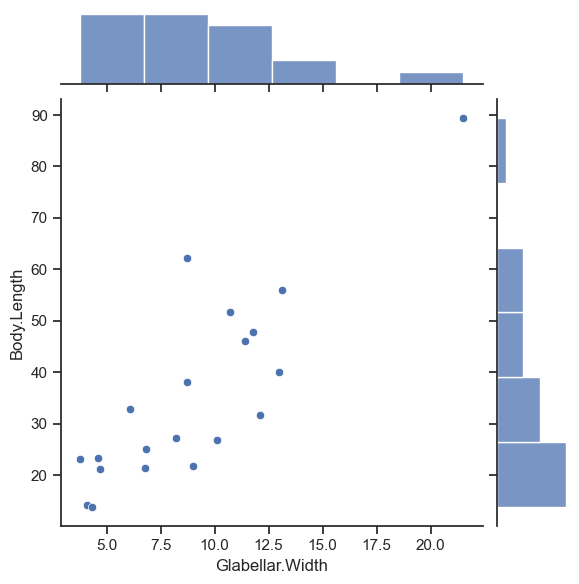

In [5]:
sns.jointplot(data=Datos, x="Glabellar.Width", y="Body.Length", kind="scatter")

## c) Explorar la correlación entre todas las parejas de variables. Grafique e interprete

 

C:\Users\pms_l\AppData\Local\Temp\ipykernel_20968\35861920.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Datos.corr()


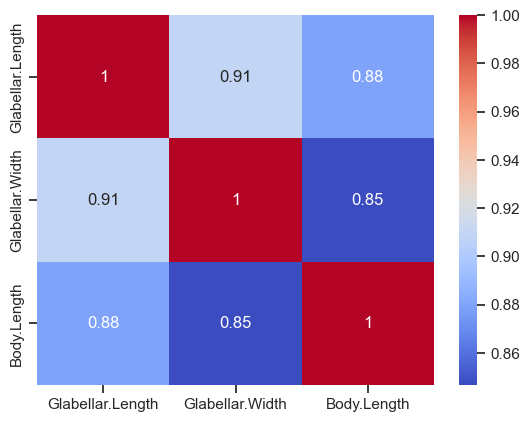

In [6]:
correlation_matrix = Datos.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


- La longitud de Glabellar tiene una correlación positiva fuerte con el ancho de Glabellar y el tamaño del cuerpo. Cuanto mayor sea la longitud de Glabellar, es más probable que el ancho de Glabellar y el tamaño del cuerpo también sean mayores.

- El ancho de Glabellar también tiene una correlación positiva fuerte con la longitud de Glabellar y el tamaño del cuerpo. Cuanto mayor sea el ancho de Glabellar, es más probable que la longitud de Glabellar y el tamaño del cuerpo también sean mayores.

- El tamaño del cuerpo tiene una correlación positiva fuerte tanto con la longitud de Glabellar como con el ancho de Glabellar. Cuanto mayores sean la longitud y el ancho de Glabellar, es más probable que el tamaño del cuerpo también sea mayor.

# 3. Regresión Lineal Múltiple 

##    Definición de variables: 

### a) Dividamos los datos en conjuntos de entrenamiento y prueba.

In [7]:
X = Datos[['Glabellar.Length', 'Glabellar.Width']]  # Variables independientes
y = Datos['Body.Length']  # Variable dependiente

### b) Utiliza train_test_split de sklearn para dividir los datos. Establece test_size = 0.3 y random_state = 101.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Entrenar el modelo: 

### c) Crear una instancia de un modelo de LinearRegression() llamado lm.

In [9]:
lm = LinearRegression()

### d) Entrenar/ajustar (Train/fit) el modelo de regresión lineal 'lm' con los datos de entrenamiento.

In [10]:
lm.fit(X_train, y_train)

LinearRegression()

# 4. Coeficientes del modelo:

## a) Imprime los estimadores de los coeficientes del modelo.

In [11]:
print('Coeficientes del modelo:', lm.coef_)

Coeficientes del modelo: [2.27238426 1.17486791]


## b) ¿Cómo interpreta estos coeficientes?

### Si los coeficientes del modelo son [2.27238426, 1.17486791], podemos interpretarlos de la siguiente manera:

- En este caso, el coeficiente de 'Glabellar.Length' indica el cambio esperado en 'Body.Length' por unidad de cambio en 'Glabellar.Length', mientras que el coeficiente de 'Glabellar.Width' indica el cambio esperado en 'Body.Length' por unidad de cambio en 'Glabellar.Width'. 
  
- Esto significa que, manteniendo el ancho de Glabellar constante, se espera que por cada unidad de aumento en la longitud de Glabellar, el tamaño del cuerpo aumente en promedio 2.27238426 unidades. Asi mismo, manteniendo la longitud de Glabellar constante, se espera que por cada unidad de aumento en el ancho de Glabellar, el tamaño del cuerpo aumente en promedio 1.17486791 unidades.

# 5. Predicción y Evaluación

## Predicción del modelo:



### a) Utilice lm.predict() para predecir el conjunto de datos X_test.



In [12]:
y_pred = lm.predict(X_test)

### b) Crear una gráfica de dispersión de los valores de prueba reales frente a los valores predichos.



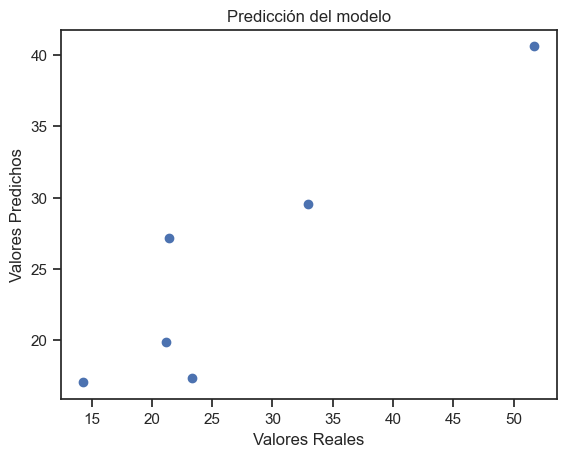

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicción del modelo')
plt.show()

## Evaluando el modelo:

###   c) Calcule el error medio absoluto, el error cuadrático medio y la raiz del error cuadrático medio.

In [14]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Error medio absoluto:', mae)
print('Error cuadrático medio:', mse)
print('Raíz del error cuadrático medio:', rmse)

Error medio absoluto: 5.0235478971585765
Error cuadrático medio: 35.284740748761216
Raíz del error cuadrático medio: 5.9400960218468875


### d) Calcule la precisión del modelo. Interprete.

In [15]:
accuracy = lm.score(X_test, y_test)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.7602591583538332


- El modelo de regresión lineal múltiple utilizado tiene una capacidad de predicción moderada. La precisión del 76% indica que el modelo puede explicar aproximadamente el 76% de la variabilidad en los datos de prueba.

- Es importante considerar el contexto y el propósito de la aplicación. Una precisión del 76% puede considerarse aceptable en algunos casos, mientras que en otros puede requerirse una precisión más alta.

- Se pueden realizar mejoras en el modelo para aumentar su precisión. Esto puede incluir la selección de características más relevantes, la incorporación de más datos o la exploración de otros algoritmos de aprendizaje automático.